### Problem Statement: 

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

### Data Description: 

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

#### Attributes:

* age : age of customer (numeric)

* job : type of job (categorical)

* marital : marital status (categorical)

* education (categorical)

* default: has credit in default? (binary)

* balance: average yearly balance, in euros (numeric)

* housing: has a housing loan? (binary)

* loan: has personal loan? (binary)

* contact: contact communication type (categorical)

* day: last contact day of the month (numeric)

* month: last contact month of year (categorical)

* duration: last contact duration, in seconds (numeric)

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#### Output (desired target):

* y - has the client subscribed to a term deposit? (binary)


In [1]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data = pd.read_csv("../input/deposit-subscription-what-makes-consumers-buy/deposit2020.csv")


In [3]:
# View the first 5 entries
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


We can see that we have a couple of categorical and numerical features. Let's check more information about our dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


From the above, we can make a few inferences e.g. there's no missing entries. Our dataset is made up of integers and categorical fields. To successfully train our model, we have to convert these non-numerical values to be numeric to allow our training models to learn as much as they can from our dataset. 

But first, let's check the statistical information of our dataset. 

In [5]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


### Exploratory Data Analysis

Let us perform exploratory data analysis where we will impute any missing values, remove any duplicates and play around / visualizeour data to better understand it. 

In [6]:
# Check null counts in all our features
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

This confirms that there are indeed no missing entries

In [7]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

In [8]:
# Confirm the new data size
data.shape

(40000, 14)

Now let us visualize our data to better understand it.

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

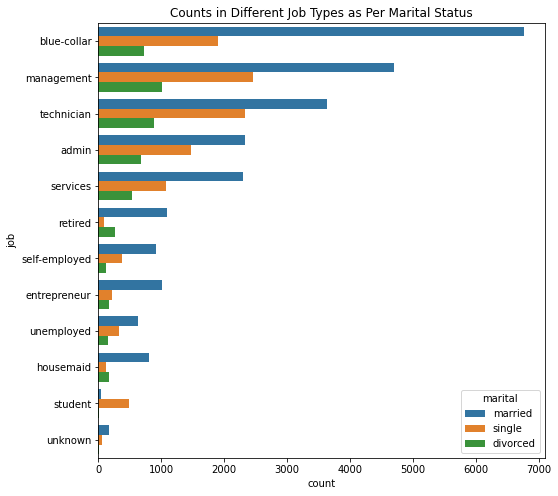

In [10]:
plt.figure(figsize=(8,8))
plt.title('Counts in Different Job Types as Per Marital Status')
sns.countplot(y = 'job', data=data, hue='marital', order=data.job.value_counts().index);


We can see that overall, our dataset is dominated by married individuals from different job industries, blue-collar, management, admin, services and retired being the top 5.

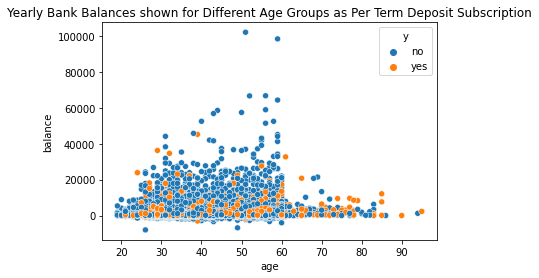

In [89]:
plt.title('Yearly Bank Balances shown for Different Age Groups as Per Term Deposit Subscription')
sns.scatterplot(x='age', y='balance', hue='y', data=data);


We can see that all the age groups have individuals who are willing to subscribe to the term deposit.

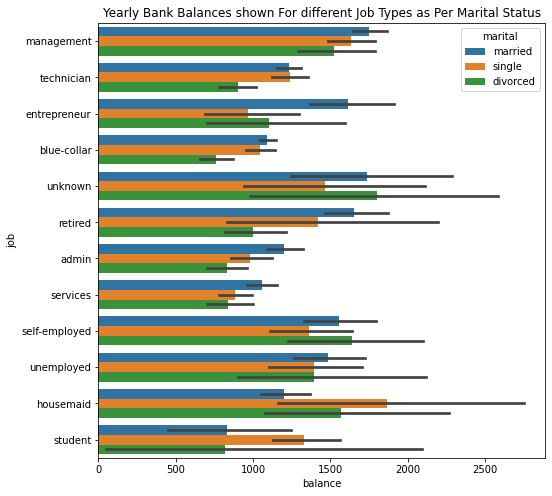

In [12]:
plt.figure(figsize=(8,8))
plt.title('Yearly Bank Balances shown For different Job Types as Per Marital Status')
sns.barplot(y='job', x='balance', hue='marital', data=data);

We can see quite interesting observations from the above graph. Single individuals working as house maids seem to saving more than most of the single individuals from different fields, but what's more interesting is that they have higher yearly balances than single people from management and technicians. This could be because they may have learned to live way below their means so they can save more or people from management & technicians just decide to spend more. It would be quite interesting if house maids get paid more than these 2 fields, but who knows? 

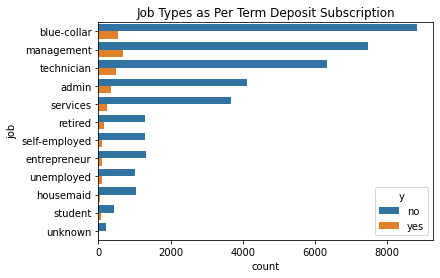

In [13]:
plt.title('Job Types as Per Term Deposit Subscription')
sns.countplot(y=data.job, hue=data.y, 
              order=data.job.value_counts().index, data=data);


We can see that only a few people among different job types subscribed to the term deposit, most being from management jobs. 

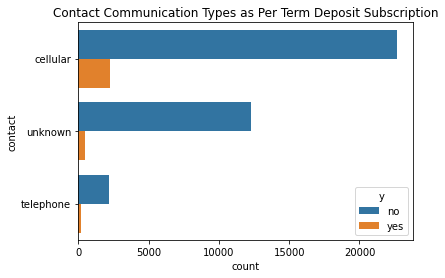

In [14]:
plt.title('Contact Communication Types as Per Term Deposit Subscription')
sns.countplot(y=data.contact, hue=data.y, 
              order=data.contact.value_counts().index, data=data);

Out of all the individuals that were contacted regarding the term deposit subcription, a large portion did not subscribe. The ones that did were mostly contacted by cellular. So, it could be that cellular is a more effective communiction type than telephone for example.

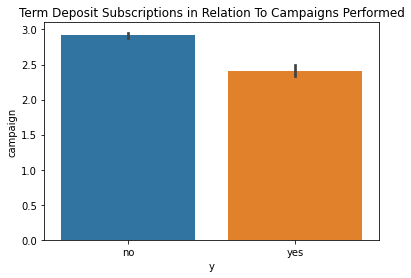

In [15]:
plt.title('Term Deposit Subscriptions in Relation To Campaigns Performed')
sns.barplot(x='y', y='campaign', data=data);

Most of the campaigns performed for 
Less individuals subscribed to term deposits had less campaigns performed for them. i.e. `More campaigns is not equivalent to more deposit term subscription.`

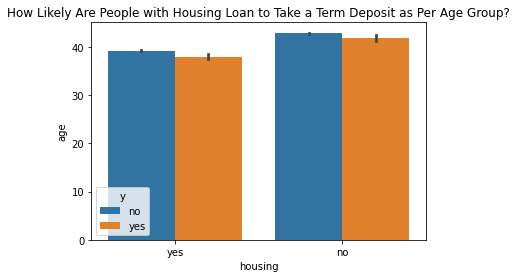

In [16]:
plt.title('How Likely Are People with Housing Loan to Take a Term Deposit as Per Age Group?')
sns.barplot(x='housing', y='age', hue='y',
           data=data);

The above plot shows quite an interesting trend. We see that people with no housing loan are the most that either takes a term deposit or not. 

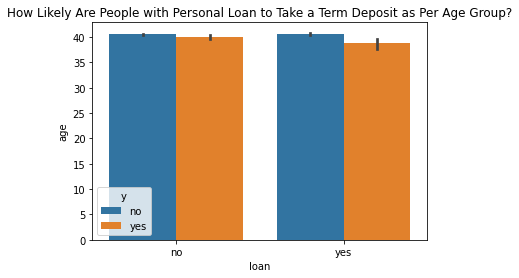

In [17]:
plt.title('How Likely Are People with Personal Loan to Take a Term Deposit as Per Age Group?')
sns.barplot(x='loan', y='age', hue='y',
           data=data);

Well, this plot tells us that both groups of people with no personal loan and those with personal loan take relatively similar decisions of not subscribing to term deposit. Those with personal loans could be not taking term deposits becuase they are still paying for the loan and they do not have spare money they can save on a term deposit. The ones with no loan could be investing it on other areas or just spending it, or maybe keeping it in their savings acc. 

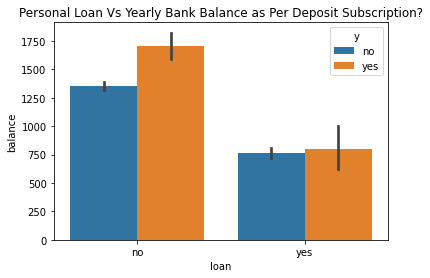

In [18]:
plt.title('Personal Loan Vs Yearly Bank Balance as Per Deposit Subscription?')
sns.barplot(x='loan', y='balance', hue='y',
           data=data);

This plot tells us that people with higher yearly bank balances and no personal loans are more likely to either subscribe to term deposit or not. 
The ones with personal loans have lower bank balances and we do have a a good number of those who subscribe to term deposits. 

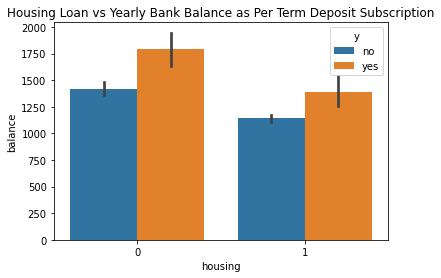

In [90]:
plt.title('Housing Loan vs Yearly Bank Balance as Per Term Deposit Subscription')
sns.barplot(x='housing', y='balance', hue='y',
           data=data);

Most individuals with no housing loan have the highest yearly bank balances on average and are the most that subscribed to this investment product.
We also have a larger portion of those with housing loan that have subscribed to the term deposit.

Now that we have taken time to see how different features behave with respective to one another, let's now check how each correlate with each other. 

Remember that our data contains numerical and non-numerical entries and the seaborn heatmap() function only works on numerical values. Instead, let's use the dython framework because it will provide us with correlations across any data type.

In [19]:
!pip install dython

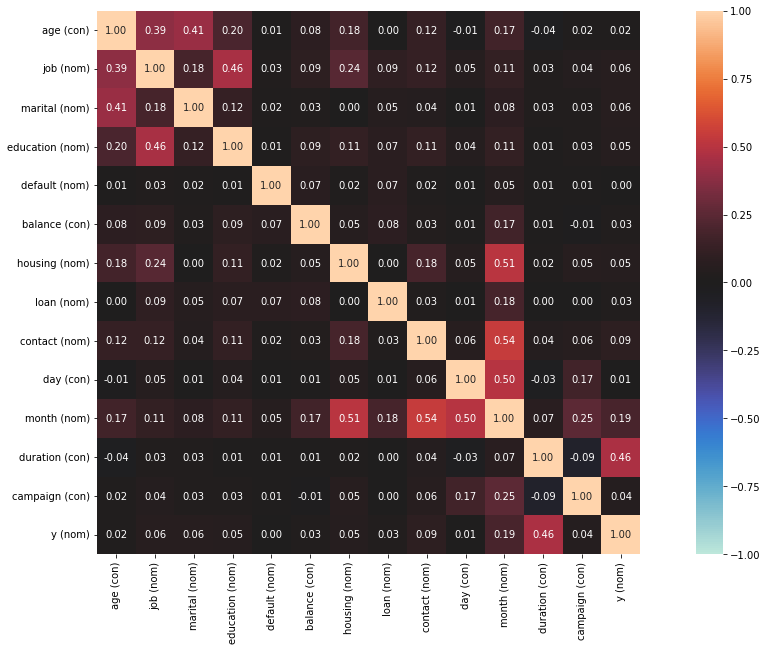

In [20]:
from dython import nominal
nominal.associations(data,figsize=(20,10),mark_columns=True);

From our correlation plot, we can see that loan housing and month of last contact, contact and month, day and month, education and job, marital and age, job and age, duration and y (deposit subscription answer) are the features with moderate positive correlations.

The rest of the features have zero correlations i.e. they do not correlate with each other at all, meaning that we will not be able to assume or estimate how one feature would behave should another feature behave a certain manner.

#### Convert Categorical To Numerical Data

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
# Get only categorical features
cat_data = data.select_dtypes(exclude='int64')

In [32]:
# Exclude the dependent variable
cat_data = cat_data.drop('y', axis=1)

In [35]:
# Instantiate label encoder
encoder = LabelEncoder()

In [36]:
# encode all categorical to numericals
for i in cat_data.columns:
    data[i] = encoder.fit_transform(data[i])

In [37]:
# Check our new data 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,no


Now  that all our features are numerical, before training our models, let us first scale our features and also check if our dependent variable has balanced classes or not. But to do that, we first have to define dependent and independent variables.

In [38]:
x = data.drop('y', axis=1)
y = data.y

#### Scaling Categorical Features

We scale the features to eliminate the possibility of the features with higher magnitude governing the trained model, and also the impact of outliers, if any, since our features are measured in different scales.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
x = scaler.fit_transform(x)

In [42]:
x[:5]

array([[0.51315789, 0.36363636, 0.5       , 0.66666667, 0.        ,
        0.09225936, 1.        , 0.        , 1.        , 0.13333333,
        0.8       , 0.05307035, 0.        ],
       [0.32894737, 0.81818182, 1.        , 0.33333333, 0.        ,
        0.07306666, 1.        , 0.        , 1.        , 0.13333333,
        0.8       , 0.03070354, 0.        ],
       [0.18421053, 0.18181818, 0.5       , 0.33333333, 0.        ,
        0.07282153, 1.        , 1.        , 1.        , 0.13333333,
        0.8       , 0.01545344, 0.        ],
       [0.36842105, 0.09090909, 0.5       , 1.        , 0.        ,
        0.08647613, 1.        , 0.        , 1.        , 0.13333333,
        0.8       , 0.01870679, 0.        ],
       [0.18421053, 1.        , 1.        , 1.        , 0.        ,
        0.07281245, 0.        , 0.        , 1.        , 0.13333333,
        0.8       , 0.04026027, 0.        ]])

Now that our data has been scaled. Let's check data distribution in our dependent feature.

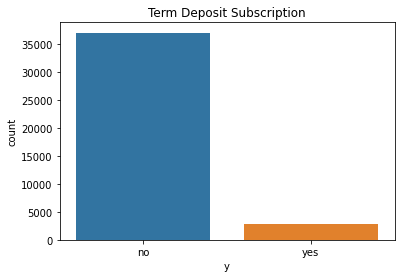

In [43]:
plt.title('Term Deposit Subscription')
sns.countplot(x=data.y);

We can see that the `no` class has more counts than the `yes` one i.e. we have an imbalanced class problem. 

In cases like these, it's never advisable to train models on imbalanced data because your model is highly likely to ignore the minority class, which in turn would make our model to make incorrect predictions. To solve this, we can either use oversampling (which duplicates the minority class) or undersampling (which deletes some entries from the majority class). 

We should keep in minnd that oversampling increases computational cost, and with undersampling we lose some data. ` And with machine learning models, the more data the better!`

In [25]:
data.shape

(40000, 14)

For this project, let us use oversampling to solve this imbalanced class problem.

#### Deal With Imbalanced Class Problem

In [48]:
#Imports
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [46]:
# Let's split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

NOw that we have our train set, we can deal with the imbalanced class problem.

In [49]:
smote = SMOTE(random_state=42)

In [50]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

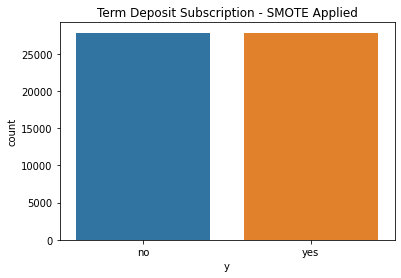

In [53]:
plt.title('Term Deposit Subscription - SMOTE Applied')
sns.countplot(x=y_train_smote);

Our data is now balanced! :) Now, we can train our models.

#### Train Models

Before we choose our models, we have to remember that we are dealing with a labelled classification problem with less than 100 000 entries. So let us first try simple classification models.

In [56]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
# To ensure that the models keep the frist randomized data
np.random.seed(42)

#### Baseline Models

#### 1. Logistic Regression

In [58]:
log_model = LogisticRegression()
log_model.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [59]:
# Accuracy
print('Logistic Regression Train Score is: ', log_model.score(x_train_smote, y_train_smote))
print('Logistic Regression Test Score is: ', log_model.score(x_test, y_test))

Logistic Regression Train Score is:  0.8388627295927537
Logistic Regression Test Score is:  0.8551


This tells us that our model only learnt close to 84% of our data, and was able to predict 85.5% of data correctly. This is not bad but let's try a more advanced model. 

#### 2. Decision Tree 

In [60]:
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [61]:
# Accuracy
print('DecisionTree Classifier Train Score is: ', dec_model.score(x_train_smote, y_train_smote))
print('DecisionTree Classifier Test Score is: ', dec_model.score(x_test, y_test))

DecisionTree Classifier Train Score is:  1.0
DecisionTree Classifier Test Score is:  0.897


We can see that our model was able to learn everything from the training set, and it was able to predict 89.7% of our data correctly. 

#### 3. Linear Support Vector Classification

In [62]:
lin_model = LinearSVC()
lin_model.fit(x_train_smote, y_train_smote)

LinearSVC()

In [64]:
# Accuracy
print('LinearSVC Train Score is: ', lin_model.score(x_train_smote, y_train_smote))
print('LinearSVC Test Score is: ', lin_model.score(x_test, y_test))

LinearSVC Train Score is:  0.837029581970454
LinearSVC Test Score is:  0.8619


Our model managed to learn 83.7% of our training data, and predicted 86.19% correctly from test data.

All these 3 models performed relatively well, but let's use them with kfold cross validation to see if we can improve their accuracy.

#### KFold Cross Validation

In [67]:
kfold = KFold(n_splits=5)

In [68]:
models = [('Logistic Regression: ', log_model), ('DecisionTree: ', dec_model), ('LinearSVC: ', lin_model)]

In [70]:
tot_results = []
for model_name, model in models:
    cv_results = cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
    tot_results.append([model_name, cv_results])
    

In [71]:
# Check accuracy results
tot_results

[['Logistic Regression: ',
  array([0.81013568, 0.80672118, 0.84795111, 0.72483825, 0.71764917])],
 ['DecisionTree: ',
  array([0.90358523, 0.90538233, 0.92550324, 0.94716032, 0.94922717])],
 ['LinearSVC: ',
  array([0.81678498, 0.81157337, 0.84687275, 0.71351546, 0.70318116])]]

Using 5-fold cross validation, decision tree classifier performs the best for all the 5 samples. Because of this, let us see if we can improve it by performing hyperparameter tuning on it.

### Hyperparameter Tuning

The tuning process refers to the process of tuning the hyperparameters to ensure a higher accuracy score. 
One way to do this is to simply plug in different values and see which hyper-parameters return the highest score, or randomly with `random search cross validation` or exhaustively with `grid search cross validation`.

We will use `GridSearchCV` :)

In [79]:
from sklearn.model_selection import GridSearchCV

Before we apply `GridSearchCV()`, we first have to decide which decision tree hyper-parameters to test.

Some hyper-parameters used by decision tree classifier:

* `criterion`: the function used to determie the quality of a split
* `max_depth`: max depth of a tree
* `max_features`: max no of features to consider when making a split
* `splitter`: strategy used to choose the split at each tree node

In [80]:
params = {
    'criterion':  ['gini', 'entropy'], 
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

In [81]:
grid_cv = GridSearchCV(estimator=dec_model,
                      param_grid=params,
                      cv=5,
                      n_jobs=5,
                      verbose=1)

In [82]:
grid_cv.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [84]:
# print the best hyper parameters
print(grid_cv.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.6, 'splitter': 'best'}


Now that we have gotten the best hyper-parameters, let us re-train our decision tree classifier and check how well it performs.

In [86]:
dec_model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                     max_features=0.6, splitter='best')
dec_model_2.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_features=0.6)

In [87]:
# Accuracy
print('DecisionTree Classifier Train Score is: ', dec_model_2.score(x_train_smote, y_train_smote))
print('DecisionTree Classifier Test Score is: ', dec_model_2.score(x_test, y_test))

DecisionTree Classifier Train Score is:  1.0
DecisionTree Classifier Test Score is:  0.8996


The model learnt everything from the training set, and was able to correctly predict from 89.7% to 89.96% which is a good improvement, but our model still performs best with 5-fold cross validation.

### Bonus(es)

Now that we are done training our models and have decided on which model to go with, we can try determine the customers that are more likely to buy the investment product. Let's answer the following questions:
1. Determine the segment(s) of customers our client should prioritize.
2. What makes the customers buy? Tell us which feature we should be focusing more on.

#### Answers:

 - The above plots show that individuals with the highest yearly bank balances on average and no personal / housing loans have subscribed to the term deposit the most, even the ones with these loans have taken this investment product,and that could be because they have high income, plus they are more likely to subscribe if being contacted frequently by cellular.
 - Most of these individuals are working in management, blue-collar, technician and admin. 